In [14]:
def linearize_dict(d, parent_key='', sep='.'):
    """
    Linearizes a nested dictionary into a flat dictionary with keys in the format `key1.key2`.

    :param d: The dictionary to linearize.
    :param parent_key: The current key being processed (used for recursion).
    :param sep: The separator between keys.
    :return: A flattened dictionary.
    """
    items = []
    
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(linearize_dict(v, new_key, sep).items())
        else:
            items.append((new_key, v))
    
    return dict(items)

### ISIC

In [66]:
import pandas as pd 
import wandb
api = wandb.Api()

filters = {
  "group": "ISIC"
}
runs = api.runs("pasqualedem/FSSWeed", filters=filters)

runs_list = []
for run in runs: 
    runs_list.append({
        **run.summary._json_dict,
        **linearize_dict({k: v for k,v in run.config.items()
          if not k.startswith('_')}),
        **{"name": run.name}
        })

runs_df = pd.DataFrame(runs_list)
runs_df


,/MulticlassF1Score,/MulticlassF1Score_background,/MulticlassF1Score_melanoma,/MulticlassF1Score_nevus,/MulticlassF1Score_seborrheic_keratosis,/MulticlassJaccardIndex,/MulticlassJaccardIndex_background,/MulticlassJaccardIndex_melanoma,/MulticlassJaccardIndex_nevus,/MulticlassJaccardIndex_seborrheic_keratosis,...,train/final_MulticlassPrecision_fg,train/final_MulticlassRecall_fg,model.params.student.name,model.params.student.num_classes,model.params.teacher.name,model.params.teacher.backbone,model.params.teacher.image_size,model.params.teacher.concat_support,model.params.teacher.model_checkpoint,model.params.teacher.backbone_checkpoint
0,0.405632,0.908383,0.187643,0.526504,0.000000,0.323249,0.832144,0.103535,0.357316,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.313304,0.906626,0.284488,0.062102,0.000000,0.256770,0.829200,0.165833,0.032046,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.408010,0.929935,0.219564,0.482541,0.000000,0.327590,0.869046,0.123320,0.317992,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.376277,0.939811,0.144277,0.421022,0.000000,0.307711,0.886455,0.077747,0.266642,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.390265,0.947423,0.158913,0.454724,0.000000,0.320170,0.900098,0.086315,0.294267,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.420687,0.889060,0.209628,0.446818,0.137243,0.319680,0.800277,0.117086,0.287679,0.073677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0.439877,0.923249,0.272370,0.452626,0.111262,0.341629,0.857440,0.157655,0.292513,0.058908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,0.358974,0.735547,0.116185,0.535085,0.049080,0.258453,0.581712,0.061675,0.365267,0.025157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,0.417316,0.903365,0.213892,0.459450,0.092557,0.322569,0.823761,0.119753,0.298238,0.048524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
cols = ["model.name", "/MulticlassJaccardIndex_fg", "dataset.datasets.test_isic.prompt_images"]
mask = runs_df["dataset.datasets.test_isic.prompt_images"].isin([9, 15, 30, 60])

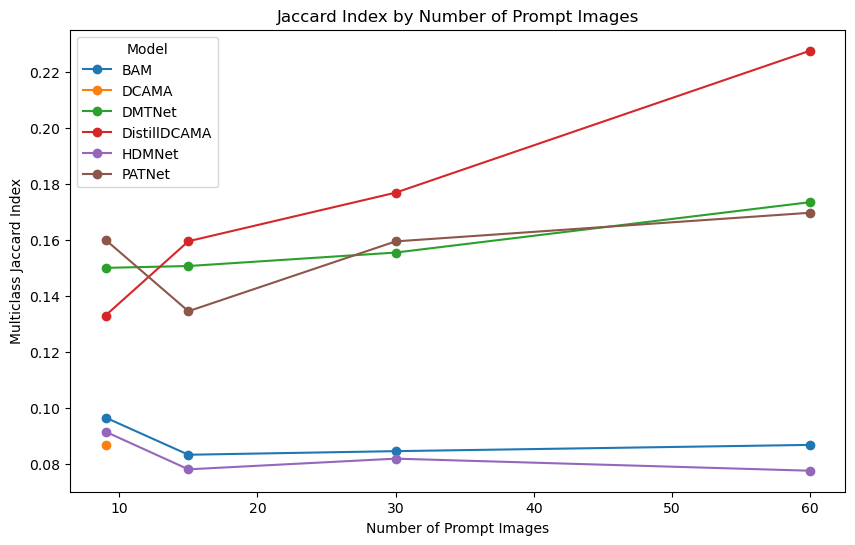

In [73]:
import matplotlib.pyplot as plt

# Filter the data using the mask
filtered_df = runs_df[cols][mask]

# rename values in model.name
filtered_df['model.name'] = filtered_df['model.name'].replace({
    'bam': 'BAM',
    'hdmnet': 'HDMNet',
    'distillator': 'DistillDCAMA',
    'dcama': 'DCAMA',
    'patnet': 'PATNet',
    'dmtnet': 'DMTNet',
})

# Group by model.name and prompt_images, then get the best Jaccard Index for each group
best_rows = filtered_df.loc[filtered_df.groupby(['model.name', 'dataset.datasets.test_isic.prompt_images'])['/MulticlassJaccardIndex_fg'].idxmax()]

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each model and plot the best Jaccard Index for each prompt image
for model_name, group in best_rows.groupby('model.name'):
    plt.plot(group['dataset.datasets.test_isic.prompt_images'], group['/MulticlassJaccardIndex_fg'], label=model_name, marker='o')

# Set labels and title
plt.xlabel('Number of Prompt Images')
plt.ylabel('Multiclass Jaccard Index')
plt.title('Jaccard Index by Number of Prompt Images')

# Add a legend
plt.legend(title='Model')

# Show the plot
plt.show()


### Lung

In [63]:
import pandas as pd 
import wandb
api = wandb.Api()

filters = {
  "group": "LungCancer"
}
runs = api.runs("pasqualedem/FSSWeed", filters=filters)

runs_list = []
for run in runs: 
    runs_list.append({
        **run.summary._json_dict,
        **linearize_dict({k: v for k,v in run.config.items()
          if not k.startswith('_')}),
        **{"name": run.name}
        })

runs_df = pd.DataFrame(runs_list)
runs_df.head()


,/MulticlassF1Score,/MulticlassF1Score_background,/MulticlassF1Score_fg,/MulticlassF1Score_nodule,/MulticlassJaccardIndex,/MulticlassJaccardIndex_background,/MulticlassJaccardIndex_fg,/MulticlassJaccardIndex_nodule,/MulticlassPrecision,/MulticlassPrecision_background,...,refinement.max_iterations,name,model.model_checkpoint,model.backbone,model.image_size,model.concat_support,model.backbone_checkpoint,model.shots,model.params.student.use_support,model.pe
0,0.499629,0.999258,0.000000,0.000000,0.499259,0.998518,0.000000,0.000000,0.499556,0.999112,...,200.0,solar-lake-297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.508033,0.998991,0.017075,0.017075,0.503297,0.997983,0.008611,0.008611,0.507085,0.999129,...,200.0,graceful-vortex-298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.506051,0.989461,0.022640,0.022640,0.495296,0.979143,0.011450,0.011450,0.505576,0.999341,...,200.0,true-water-299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.545012,0.997141,0.092884,0.092884,0.521501,0.994298,0.048704,0.048704,0.526739,0.999401,...,200.0,curious-fire-300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.371702,0.740110,0.003295,0.003295,0.294545,0.587440,0.001650,0.001650,0.500650,0.999650,...,NaN,laced-durian-301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
prompt_images_col = 'dataset.datasets.test_lungcancer.prompt_images'

In [65]:
prompt_images = [5]

cols = ["model.name", "/MulticlassJaccardIndex_fg", prompt_images_col]
mask = runs_df[prompt_images_col].isin(prompt_images)
runs_df[mask][cols]

,model.name,/MulticlassJaccardIndex_fg,dataset.datasets.test_lungcancer.prompt_images
4,bam,0.001650,5
5,hdmnet,0.000450,5
6,dmtnet,0.001605,5
7,dcama,0.001780,5
8,dcama,0.027976,5
9,dcama,0.024666,5
10,dcama,0.025899,5
23,dcama,0.025551,5
24,dcama,0.023633,5
25,dcama,0.024157,5


In [ ]:
prompt_images = [5, 10, 25, 50]

cols = ["model.name", "/MulticlassJaccardIndex_fg", prompt_images_col]
mask = runs_df[prompt_images_col].isin(prompt_images)

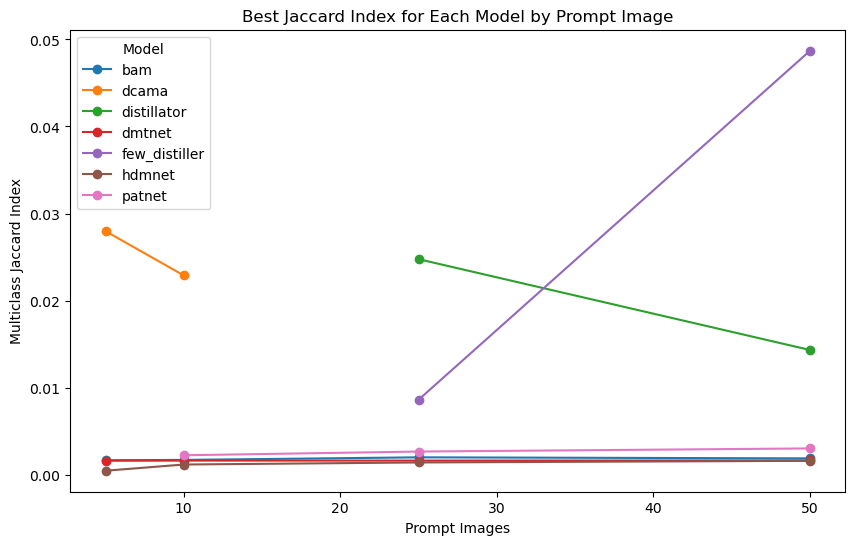

In [ ]:
import matplotlib.pyplot as plt

# Filter the data using the mask
filtered_df = runs_df[cols][mask]

# Group by model.name and prompt_images, then get the best Jaccard Index for each group
best_rows = filtered_df.loc[filtered_df.groupby(['model.name', prompt_images_col])['/MulticlassJaccardIndex_fg'].idxmax()]

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each model and plot the best Jaccard Index for each prompt image
for model_name, group in best_rows.groupby('model.name'):
    plt.plot(group[prompt_images_col], group['/MulticlassJaccardIndex_fg'], label=model_name, marker='o')

# Set labels and title
plt.xlabel('Prompt Images')
plt.ylabel('Multiclass Jaccard Index')
plt.title('Best Jaccard Index for Each Model by Prompt Image')

# Add a legend
plt.legend(title='Model')

# Show the plot
plt.show()


### Pothole

In [5]:
import pandas as pd 
import wandb
api = wandb.Api()

prompt_images_col = 'dataset.datasets.test_pothole.prompt_images'
filters = {
  "group": "Pothole"
}
runs = api.runs("pasqualedem/FSSWeed", filters=filters)

runs_list = []
for run in runs: 
    runs_list.append({
        **run.summary._json_dict,
        **linearize_dict({k: v for k,v in run.config.items()
          if not k.startswith('_')}),
        **{"name": run.name}
        })

runs_df = pd.DataFrame(runs_list)
runs_df.head()


,/MulticlassF1Score,/MulticlassF1Score_background,/MulticlassF1Score_fg,/MulticlassF1Score_pothole,/MulticlassJaccardIndex,/MulticlassJaccardIndex_background,/MulticlassJaccardIndex_fg,/MulticlassJaccardIndex_pothole,/MulticlassPrecision,/MulticlassPrecision_background,...,model.params.student.num_classes,model.params.teacher.name,model.params.teacher.backbone,model.params.teacher.image_size,model.params.teacher.concat_support,model.params.teacher.model_checkpoint,model.params.teacher.backbone_checkpoint,tracker.mode,tracker.cache_dir,tracker.offline_directory
0,0.640222,0.976372,0.304072,0.304072,0.566565,0.953834,0.179296,0.179296,0.728160,0.963853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.612364,0.971922,0.252806,0.252806,0.545035,0.945378,0.144693,0.144693,0.650711,0.962749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.640337,0.974484,0.306191,0.306191,0.565504,0.950237,0.180771,0.180771,0.694865,0.964557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.591771,0.970621,0.212921,0.212921,0.531032,0.942919,0.119145,0.119145,0.624805,0.961233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.642383,0.972401,0.312364,0.312364,0.565687,0.946285,0.185090,0.185090,0.672447,0.965560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
runs_df

,/MulticlassF1Score,/MulticlassF1Score_background,/MulticlassF1Score_fg,/MulticlassF1Score_pothole,/MulticlassJaccardIndex,/MulticlassJaccardIndex_background,/MulticlassJaccardIndex_fg,/MulticlassJaccardIndex_pothole,/MulticlassPrecision,/MulticlassPrecision_background,...,model.params.student.num_classes,model.params.teacher.name,model.params.teacher.backbone,model.params.teacher.image_size,model.params.teacher.concat_support,model.params.teacher.model_checkpoint,model.params.teacher.backbone_checkpoint,tracker.mode,tracker.cache_dir,tracker.offline_directory
0,0.640222,0.976372,0.304072,0.304072,0.566565,0.953834,0.179296,0.179296,0.728160,0.963853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.612364,0.971922,0.252806,0.252806,0.545035,0.945378,0.144693,0.144693,0.650711,0.962749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.640337,0.974484,0.306191,0.306191,0.565504,0.950237,0.180771,0.180771,0.694865,0.964557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.591771,0.970621,0.212921,0.212921,0.531032,0.942919,0.119145,0.119145,0.624805,0.961233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.642383,0.972401,0.312364,0.312364,0.565687,0.946285,0.185090,0.185090,0.672447,0.965560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.553209,0.972274,0.134145,0.134145,0.508969,0.946043,0.071895,0.071895,0.603971,0.958064,...,1.0,dcama,resnet50,384.0,False,checkpoints/resnet50_fold0_pascal_modcross_sof...,checkpoints/resnet50_a1h-35c100f8.pth,NaN,tmp,NaN
108,0.549803,0.959996,0.139611,0.139611,0.499056,0.923069,0.075044,0.075044,0.550874,0.959023,...,1.0,dcama,resnet50,384.0,False,checkpoints/resnet50_fold0_pascal_modcross_sof...,checkpoints/resnet50_a1h-35c100f8.pth,NaN,tmp,NaN
109,0.552268,0.966417,0.138118,0.138118,0.504599,0.935016,0.074182,0.074182,0.566752,0.958554,...,1.0,dcama,resnet50,384.0,False,checkpoints/resnet50_fold0_pascal_modcross_sof...,checkpoints/resnet50_a1h-35c100f8.pth,NaN,tmp,NaN
110,0.547594,0.957244,0.137944,0.137944,0.496038,0.917993,0.074082,0.074082,0.545922,0.959111,...,1.0,dcama,resnet50,384.0,False,checkpoints/resnet50_fold0_pascal_modcross_sof...,checkpoints/resnet50_a1h-35c100f8.pth,NaN,tmp,NaN


In [35]:
pd.notna(runs_df["refinement.lr"]) & runs_df["model.name"] == "dcama"

0      False
1      False
2      False
3      False
4      False
       ...  
107    False
108    False
109    False
110    False
111    False
Length: 112, dtype: bool

In [50]:
runs_df[pd.notna(runs_df["refinement.lr"]) & (runs_df["model.name"] == "dcama")]

,/MulticlassF1Score,/MulticlassF1Score_background,/MulticlassF1Score_fg,/MulticlassF1Score_pothole,/MulticlassJaccardIndex,/MulticlassJaccardIndex_background,/MulticlassJaccardIndex_fg,/MulticlassJaccardIndex_pothole,/MulticlassPrecision,/MulticlassPrecision_background,...,model.params.student.num_classes,model.params.teacher.name,model.params.teacher.backbone,model.params.teacher.image_size,model.params.teacher.concat_support,model.params.teacher.model_checkpoint,model.params.teacher.backbone_checkpoint,tracker.mode,tracker.cache_dir,tracker.offline_directory
0,0.640222,0.976372,0.304072,0.304072,0.566565,0.953834,0.179296,0.179296,0.728160,0.963853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.612364,0.971922,0.252806,0.252806,0.545035,0.945378,0.144693,0.144693,0.650711,0.962749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.640337,0.974484,0.306191,0.306191,0.565504,0.950237,0.180771,0.180771,0.694865,0.964557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.591771,0.970621,0.212921,0.212921,0.531032,0.942919,0.119145,0.119145,0.624805,0.961233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.642383,0.972401,0.312364,0.312364,0.565687,0.946285,0.185090,0.185090,0.672447,0.965560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.641897,0.974354,0.309439,0.309439,0.566515,0.949991,0.183040,0.183040,0.693703,0.964757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.592454,0.977028,0.207880,0.207880,0.535542,0.955087,0.115997,0.115997,0.747084,0.960021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0.570622,0.977133,0.164111,0.164111,0.522339,0.955288,0.089391,0.089391,0.757412,0.958646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.565362,0.976971,0.153753,0.153753,0.519129,0.954979,0.083279,0.083279,0.747677,0.958358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.580867,0.977176,0.184558,0.184558,0.528515,0.955370,0.101660,0.101660,0.757051,0.959257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
runs_df[pd.notna(runs_df["refinement.lr"]) & runs_df["model.name"] == "dcama"]

,/MulticlassF1Score,/MulticlassF1Score_background,/MulticlassF1Score_fg,/MulticlassF1Score_pothole,/MulticlassJaccardIndex,/MulticlassJaccardIndex_background,/MulticlassJaccardIndex_fg,/MulticlassJaccardIndex_pothole,/MulticlassPrecision,/MulticlassPrecision_background,...,model.params.student.num_classes,model.params.teacher.name,model.params.teacher.backbone,model.params.teacher.image_size,model.params.teacher.concat_support,model.params.teacher.model_checkpoint,model.params.teacher.backbone_checkpoint,tracker.mode,tracker.cache_dir,tracker.offline_directory


In [59]:
filtered_df.iloc[0]['refinement.lr']

KeyError: 'refinement.lr'

In [61]:
prompt_images = [5, 10, 25, 50]

cols = ["model.name", "/MulticlassJaccardIndex_fg", prompt_images_col, "model.backbone", "refinement.lr"]
mask = runs_df[prompt_images_col].isin(prompt_images)
filtered_df = runs_df[cols][mask]

# Replace NaN values in "model.backbone" with values from "model.params.teacher.backbone"
filtered_df['model.backbone'] = filtered_df['model.backbone'].fillna(runs_df['model.params.teacher.backbone'])

# Change model.name to TransferFSS when refinement.lr is not NaN and model.name is dcama
filtered_df['model.name'] = filtered_df.apply(
    lambda row: 'TransferFSS' if row['model.name'] == 'dcama' and pd.notna(row['refinement.lr']) else row['model.name'],
    axis=1
)

# Append model.backbone to model.name where model.backbone is not NaN
filtered_df['model.name'] = filtered_df.apply(
    lambda row: f"{row['model.name']} ({row['model.backbone']})" if pd.notna(row['model.backbone']) else row['model.name'],
    axis=1
)

filtered_df.drop(columns=['model.backbone', 'refinement.lr'], inplace=True)
filtered_df

,model.name,/MulticlassJaccardIndex_fg,dataset.datasets.test_pothole.prompt_images
10,TransferFSS (swin),0.115997,5
11,TransferFSS (swin),0.089391,5
12,TransferFSS (swin),0.083279,5
13,TransferFSS (swin),0.101660,5
14,TransferFSS (swin),0.146358,10
...,...,...,...
107,distillator (resnet50),0.071895,25
108,distillator (resnet50),0.075044,5
109,distillator (resnet50),0.074182,50
110,distillator (resnet50),0.074082,50


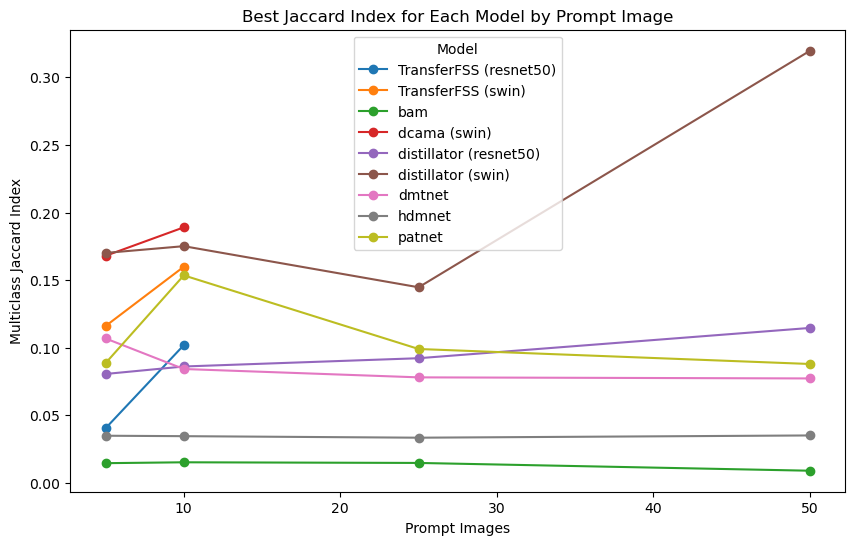

In [62]:
import matplotlib.pyplot as plt

# Group by model.name and prompt_images, then get the best Jaccard Index for each group
best_rows = filtered_df.loc[filtered_df.groupby(['model.name', prompt_images_col])['/MulticlassJaccardIndex_fg'].idxmax()]

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each model and plot the best Jaccard Index for each prompt image
for model_name, group in best_rows.groupby('model.name'):
    plt.plot(group[prompt_images_col], group['/MulticlassJaccardIndex_fg'], label=model_name, marker='o')

# Set labels and title
plt.xlabel('Prompt Images')
plt.ylabel('Multiclass Jaccard Index')
plt.title('Best Jaccard Index for Each Model by Prompt Image')

# Add a legend
plt.legend(title='Model')

# Show the plot
plt.show()
